In [80]:
import torch

checkpoint = torch.load(r"C:\Users\Kulde\OneDrive\Desktop\OFFICE\CAR_PREDICT\models\model.pth")
print(checkpoint.keys())  # Shows keys like 'state_dict', 'epoch', etc.
print(checkpoint['state_dict']) 

odict_keys(['linear.weight', 'linear.bias', 'linear1.weight', 'linear1.bias'])


C:\Users\Kulde\AppData\Local\Temp\ipykernel_19184\3901676805.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r"C:\Users\Kulde\OneDrive\Desktop\OF

KeyError: 'state_dict'

In [ ]:
import matplotlib as plt
import pandas as pd

dataset1 = pd.read_csv(r"C:\Users\Kulde\OneDrive\Desktop\OFFICE\CAR_PREDICT\data\processed\cleaned_car_csv.csv")




In [45]:
from sklearn.model_selection import train_test_split 

x = dataset1.drop(columns=['price'])
y = dataset1['price']

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
type(y_train_full)

pandas.core.series.Series

In [62]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

scaler_y = StandardScaler()
y_train_full = scaler_y.fit_transform(pd.DataFrame(y_train_full))
y_test = scaler_y.transform(pd.DataFrame(y_test))

target_encoder = TargetEncoder(smoothing=10000)
x_train_full = target_encoder.fit_transform(x_train_full, y_train_full)
x_test = target_encoder.transform(x_test)
# joblib.dump(target_encoder,config.ENCODER_PATH)

scaler_x = StandardScaler()
x_train_full = scaler_x.fit_transform(x_train_full)
x_test = scaler_x.transform(x_test)
# joblib.dump(scaler_x,config.SCALER_X_PATH)
# self.logger.info("scaling and encoding done......")


x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [75]:
x_val.shape

(27042, 10)

In [66]:
type(y_train_full)

numpy.ndarray

In [60]:
y_train_full.ndim

2

In [49]:
type(x_train_full)

pandas.core.frame.DataFrame

In [81]:
import torch
from torch import nn

class Model1(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = nn.Linear(num_features, 128)
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(128, 1)

    def forward(self, features):
        out = self.linear(features)
        out = self.relu(out)
        out = self.linear1(out)
        return out

# Example Usage:
input_size = 10  # Example: 10 input features
model = Model1(input_size)

# Create a dummy input tensor
dummy_input = torch.randn(32, input_size)  # Batch of 32 samples, each with 10 features

# Pass the input through the model
output = model(dummy_input)

print("Input shape:", dummy_input.shape)   # Output: torch.Size([32, 10])
print("Output shape:", output.shape)      # Output: torch.Size([32, 1])
print(model) #prints the model architecture

Input shape: torch.Size([32, 10])
Output shape: torch.Size([32, 1])
Model1(
  (linear): Linear(in_features=10, out_features=128, bias=True)
  (relu): ReLU()
  (linear1): Linear(in_features=128, out_features=1, bias=True)
)


In [82]:
torch.save(model,"model1.pth")



In [ ]:
print(state_dict['linear.weight'])

In [92]:
checkpoint = torch.load(r"C:\Users\Kulde\OneDrive\Desktop\OFFICE\CAR_PREDICT\notebooks\model1.pth")
checkpoint.state_dict()
print(checkpoint['linear.weight'])

C:\Users\Kulde\AppData\Local\Temp\ipykernel_19184\2699496431.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r"C:\Users\Kulde\OneDrive\Desktop\OF

TypeError: 'Model1' object is not subscriptable

In [67]:
from torch import nn
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [68]:
train_dataset = CustomDataset(x_train, y_train)

In [71]:
type(train_dataset)

__main__.CustomDataset

In [43]:
dataset1['model'].tail().str.split().str.slice(0,3).str.join(' ')

# dataset1['model'] = dataset1['model']
# # .str.split().str.slice(0, 3).str.join(' ')
# dataset1['model']

426875     maxima s sedan
426876    s60 t5 momentum
426877      xt4 sport suv
426878       es 350 sedan
426879      4 series 430i
Name: model, dtype: object

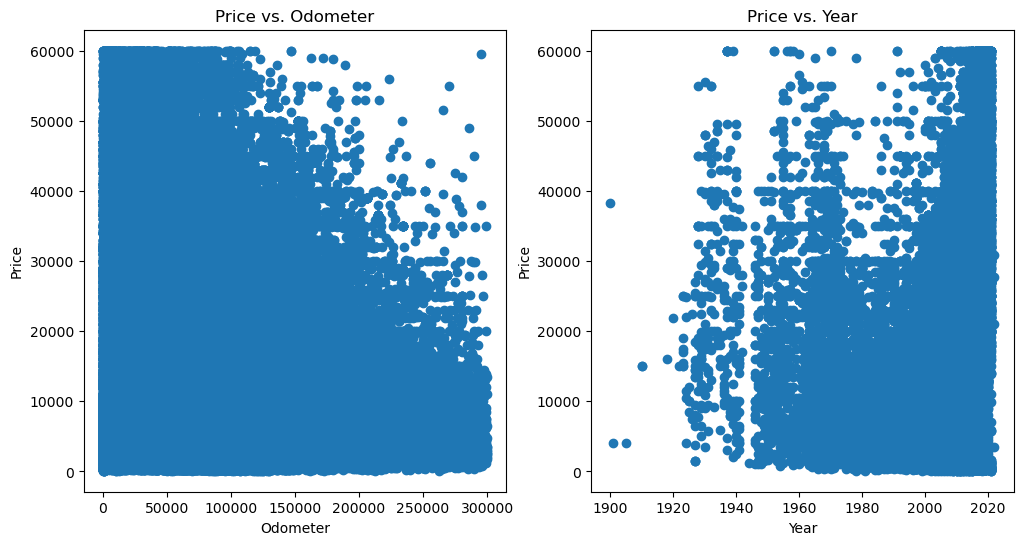

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create two subplots side-by-side
plt.scatter(dataset1['odometer'], dataset1['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price vs. Odometer')

plt.subplot(1, 2, 2)
plt.scatter(dataset1['year'], dataset1['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs. Year')
plt.show()

In [ ]:
correlation_matrix = dataset1[['price', 'odometer', 'year']].corr()
print("\nCorrelation Matrix:\n",correlation_matrix)


Correlation Matrix:
              price  odometer     year
price     1.000000 -0.573873  0.39589
odometer -0.573873  1.000000 -0.32992
year      0.395890 -0.329920  1.00000


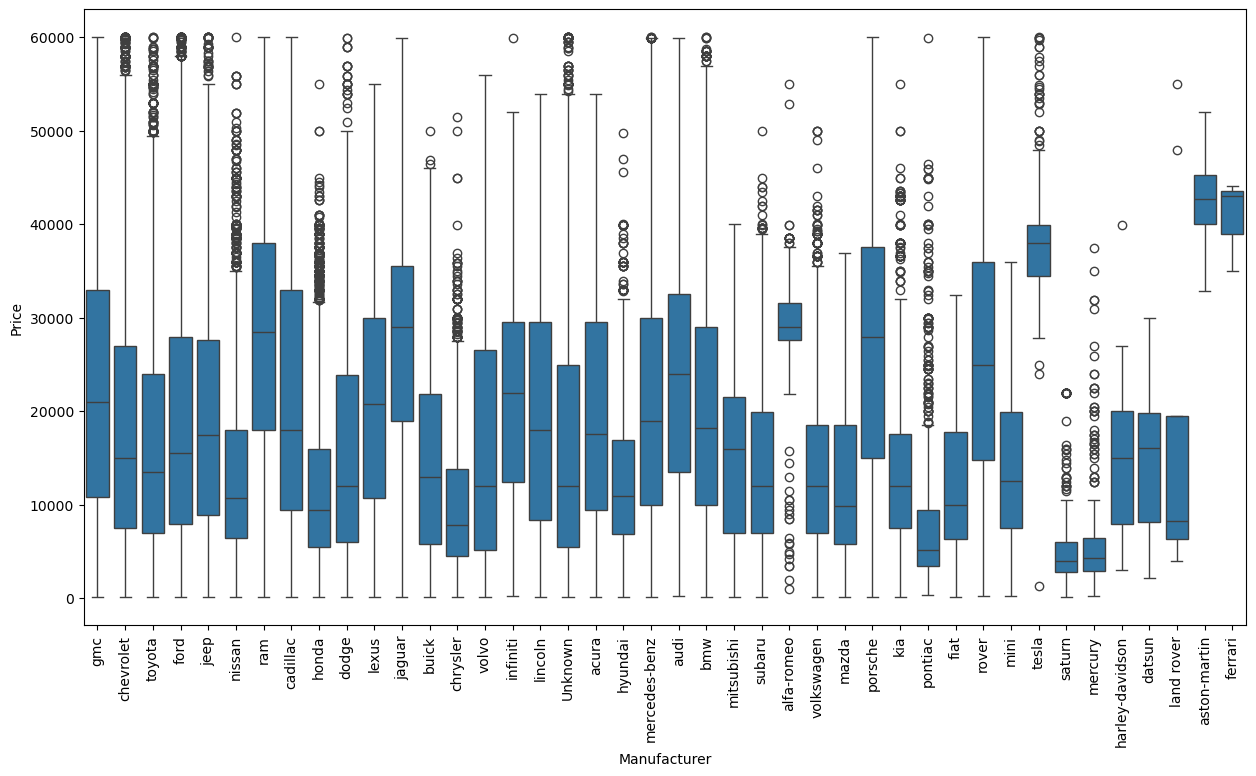

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='price', data=dataset1)
plt.xlabel('Manufacturer')
plt.ylabel('Price')

plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='price', ylabel='Density'>

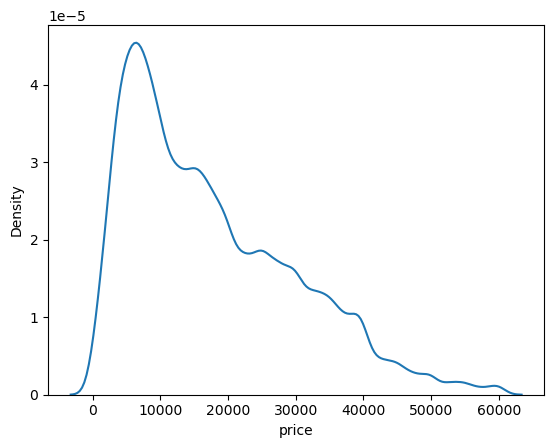

In [ ]:
sns.kdeplot(dataset1['price'])

In [ ]:

pd.DataFrame(dataset1['price'])


,price
0,33590
1,22590
2,39590
3,30990
4,15000
...,...
169160,30990
169161,33590
169162,30590
169163,34990


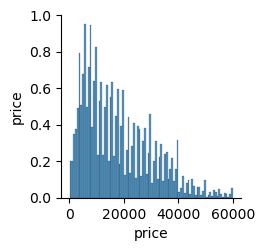

In [ ]:

sns.pairplot(pd.DataFrame(dataset1['price']))

[]

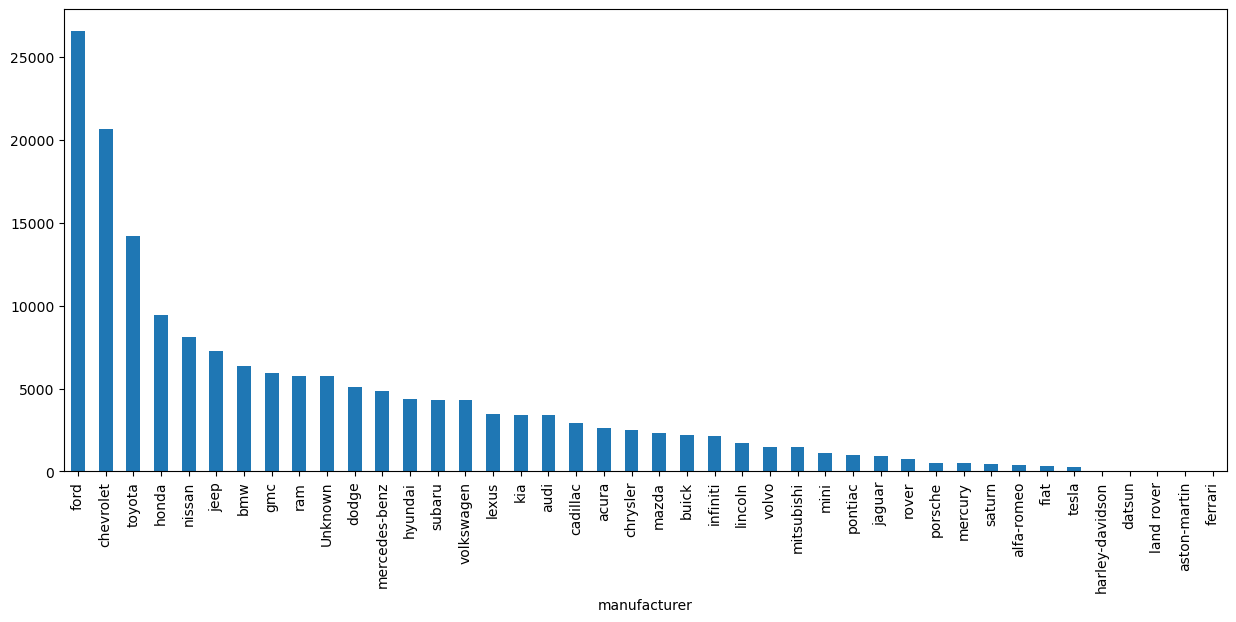

In [ ]:
plt.figure(figsize=(15, 6))
dataset1['manufacturer'].value_counts().plot(kind='bar')
plt.plot()
# dataset1['year'].value_counts().plot(kind='bar')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'cadillac'),
  Text(8, 0, 'honda'),
  Text(9, 0, 'dodge'),
  Text(10, 0, 'lexus'),
  Text(11, 0, 'jaguar'),
  Text(12, 0, 'buick'),
  Text(13, 0, 'chrysler'),
  Text(14, 0, 'volvo'),
  Text(15, 0, 'infiniti'),
  Text(16, 0, 'lincoln'),
  Text(17, 0, 'Unknown'),
  Text(18, 0, 'acura'),
  Text(19, 0, 'hyundai'),
  Text(20, 0, 'mercedes-benz'),
  Text(21, 0, 'audi'),
  Text(22, 0, 'bmw'),
  Text(23, 0, 'mitsubishi'),
  Text(24, 0, 'subaru'),
  Text(25, 0, 'alfa-romeo'),
  Text(26, 0, 'volkswagen'),
  Text(27, 0, 'mazda'),
  Text(28, 0, 'porsche'),
  Text(29, 0, 'kia'),
  Text(30,

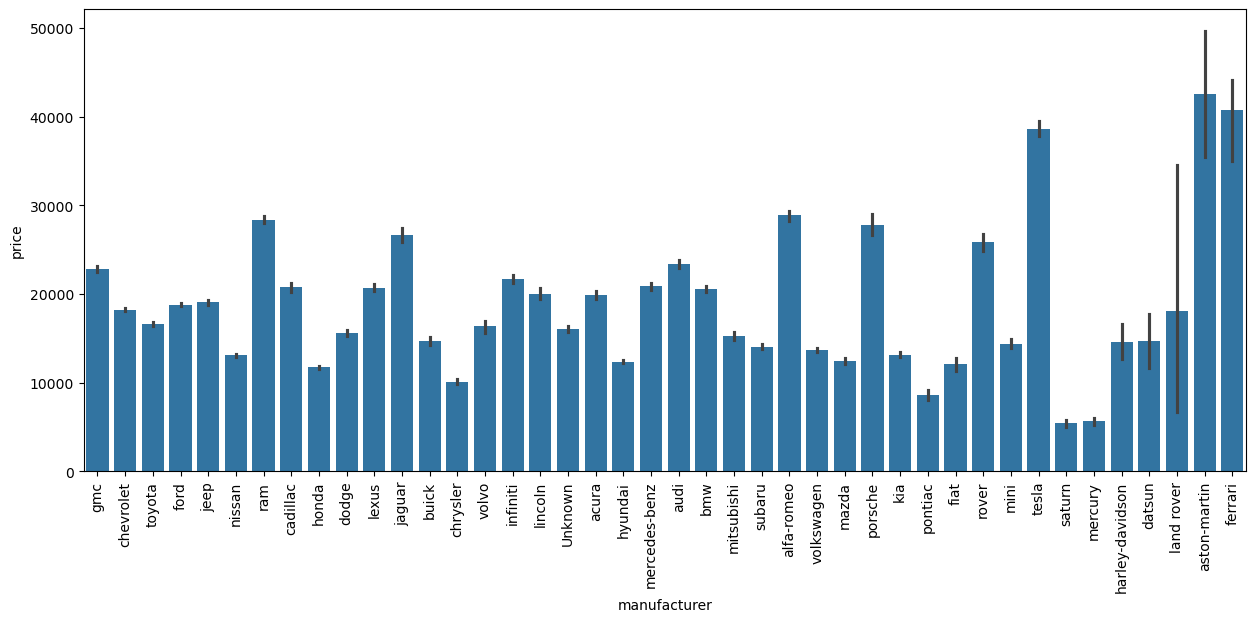

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=dataset1['manufacturer'],y=dataset1['price'])
plt.xticks(rotation = 90)

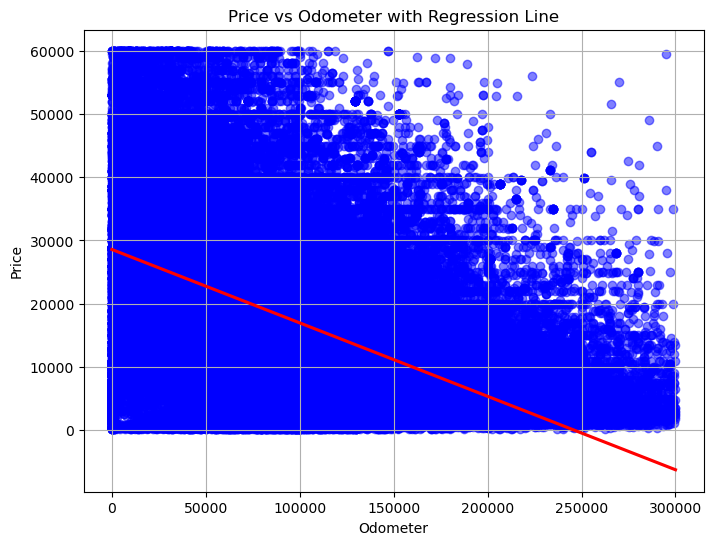

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with 'price' and 'odometer' columns
plt.figure(figsize=(8, 6))
sns.regplot(x='odometer', y='price', data=dataset1, scatter_kws={'color':'blue', 'alpha':0.5}, line_kws={'color':'red'})
plt.title('Price vs Odometer with Regression Line')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
df = dataset1[['price','odometer']]

In [ ]:
df = df.sort_values(by='price')
df

,price,odometer
55402,101,100942
153216,103,0
55377,105,69196
12288,109,95159
106951,111,86467
...,...,...
36342,59999,37458
125329,59999,28073
163739,59999,17201
125235,59999,30282


<Axes: xlabel='odometer', ylabel='price'>

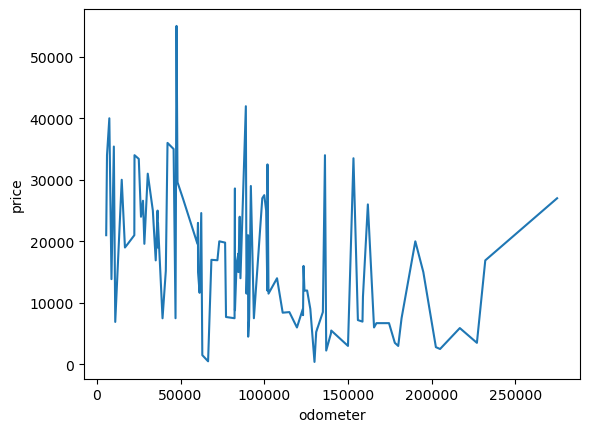

In [ ]:
sns.lineplot(x=df['odometer'].sample(100),y=df['price'])

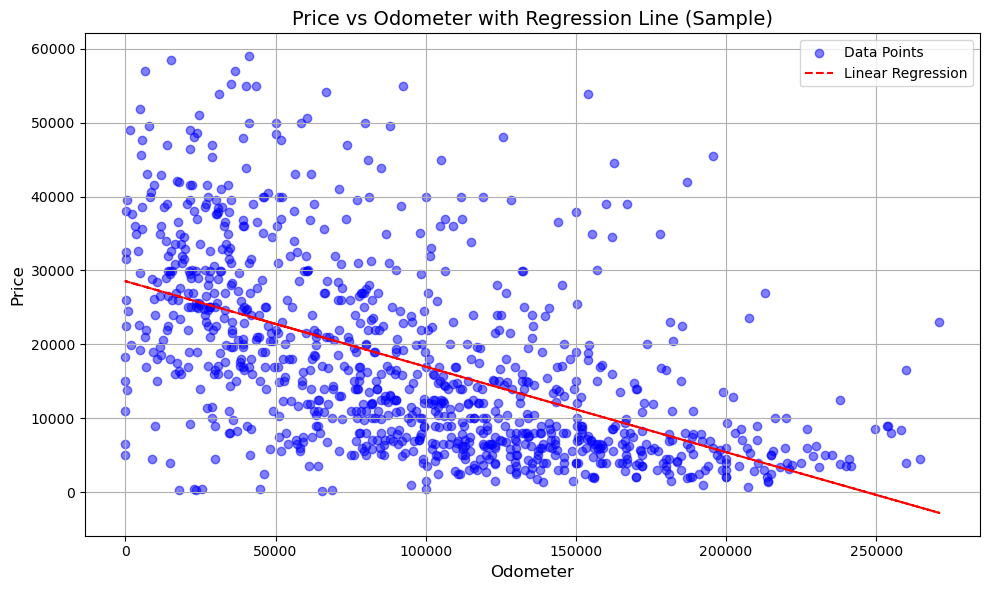

In [ ]:
df_sample = df.sample(n=1000) 


df_sample = df_sample.sort_values(by='price')


plt.figure(figsize=(10, 6)) 
plt.scatter(df_sample['odometer'], df_sample['price'], alpha=0.5, color='blue', label='Data Points')


z = np.polyfit(df_sample['odometer'], df_sample['price'], 1)
p = np.poly1d(z)
plt.plot(df_sample['odometer'], p(df_sample['odometer']), color='red', linestyle='--', label='Linear Regression')


plt.xlabel('Odometer', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Odometer with Regression Line (Sample)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)

# Show the plot
# plt.tight_layout() 
plt.show()
